# "Pre-lecture" HW


## Question 1

Standard Deviation (SD):
- A measure of how spread out the individual data points are in a dataset.
- It tells you how much variation there is within the data itself.

Standard Error of the Mean (SEM):
- A measure of how accurately your sample mean estimates the true population mean.
- It tells you how much the sample mean would vary if you repeated the experiment multiple times.

Difference:
- SD measures the spread of the data.
- SEM measures the precision of the sample mean as an estimate of the population mean (and gets smaller with larger sample sizes).

### Summary of Interactions with ChatGPT

1. User Inquiry on "Standard Error of the Mean" vs. "Standard Deviation":
- The user asked about the difference between the "standard error of the mean" and "standard deviation," referencing a video that described the standard error of the mean as the "standard deviation" of the distribution of bootstrapped means.

Response Provided:

- Standard Deviation (SD): Describes the spread or variability of individual data points around the mean.
- Standard Error of the Mean (SEM): Describes the precision of the sample mean as an estimate of the population mean, calculated as the standard deviation of the sampling distribution of the mean.
- Clarified that SEM is typically smaller than SD and decreases with larger sample sizes. In bootstrapping, the SEM is the standard deviation of the bootstrapped means.
2. User Inquiry on "Dispersion" vs. "Spread or Scale":
- The user asked if "dispersion" is equivalent to the "spread of the data" or the "scale of the data," after hearing the term for the first time.

Response Provided:

- Dispersion refers to the spread or variability of the data points.
- It's quantified using measures like the range, variance, standard deviation, and interquartile range (IQR).
- Clarified that spread and dispersion are equivalent concepts, while scale refers more to the magnitude of the data values, which can influence the observed spread.


[Chatbot transcript](https://chatgpt.com/share/66fae135-3214-800f-8898-94b2ee97f2d9)

## Question 2

How to use the standard error of the mean to create a 95% confidence interval that covers 95% of the bootstrapped sample means:

Steps:
1. Take many bootstrap samples:

- From your original dataset, create many new samples by randomly selecting data points with replacement (this means the same data point can be picked more than once). These are your bootstrap samples.

2. Calculate the mean for each bootstrap sample:

- For each of these bootstrap samples, calculate the mean. After doing this for all your samples, you will have a distribution of bootstrapped means.

3. Find the standard error (SE) of the bootstrapped means:

- The SE is simply the standard deviation of the bootstrapped sample means. This tells you how much those means are varying.
- Use the SE to create the confidence interval:

- To make a 95% confidence interval, multiply the SE by 1.96 (this number comes from the 95% confidence level).
- This gives you the margin of error (ME).

4. Create the final confidence interval:

- Take your original sample mean and add and subtract the margin of error (ME) from it.

### Summary of Interactions with ChatGPT
1. Standard Error and Confidence Interval Explanation:

- We discussed how to use the standard error of the mean (SE) to calculate a 95% confidence interval.
- The process involves:
    - Calculating the SE: SE = standard deviation / √sample size.
    - Choosing a confidence level: For 95%, the corresponding Z-score is 1.96.
    - Finding the margin of error (ME): ME = Z * SE.
    - Creating the confidence interval: Subtract and add the ME to the sample mean to get the interval (mean - ME, mean + ME).
2. Bootstrapped Confidence Intervals:

- We then discussed how the standard error could be used to construct a confidence interval that covers 95% of bootstrapped sample means.
- The steps involved are:
    - Generate bootstrap samples from the original data.
    - Calculate the mean for each bootstrap sample to get a distribution of bootstrapped means.
    - Find the SE by computing the standard deviation of the bootstrapped means.
    - Use the SE to calculate the margin of error and create the 95% confidence interval (mean ± ME).
3. Practical Implementation in a Notebook:

    - I provided a simple Python code that demonstrates how to:
        - Generate bootstrap samples.
        - Calculate the confidence interval based on the bootstrapped means.
        - Visualize the bootstrapped means and overlay the confidence interval on a plot.
4. Final Result:

    - The result is a confidence interval (in the example, 95%) that covers 95% of the bootstrapped sample means and a visual representation through a histogram plot showing the distribution of bootstrapped means, the original mean, and the confidence bounds.

[Chatbot transcript](https://chatgpt.com/share/66fae5e8-9898-800f-af9a-6b4f679abf47)

## Question 3

To create a 95% bootstrapped confidence interval without using the standard deviation of the bootstrapped means, you can use the percentile method. Here’s how:

- Steps:
    - Generate Bootstrap Samples:

        - From your original dataset, randomly resample with replacement many times (e.g., 1,000 or 10,000 bootstrap samples).
            - Calculate the Mean for Each Bootstrap Sample:

            - Compute the mean for each of the bootstrap samples. This gives you a distribution of bootstrapped means.
            - Determine the Confidence Interval from Percentiles:

            - To create a 95% confidence interval, simply take the 2.5th percentile and 97.5th percentile of the bootstrapped means. These percentiles represent the lower and upper bounds of the confidence interval, covering 95% of the bootstrapped sample means.
            
 This method doesn't require calculating the standard error; it relies directly on the bootstrapped distribution to estimate the confidence interval.

### Summary of Interactions with ChatGPT
1. Bootstrapped Confidence Intervals without Standard Error:

- We discussed how to create a 95% bootstrapped confidence interval using the percentile method without relying on the standard deviation of the bootstrapped means.
- The steps include:
    - Generating bootstrap samples from the original dataset by resampling with replacement.
    - Calculating the mean for each bootstrap sample to obtain a distribution of bootstrapped means.
    - Determining the 2.5th and 97.5th percentiles of the bootstrapped means to establish the lower and upper bounds of the confidence interval.
2. Explanation of Percentiles:

- A percentile indicates the relative standing of a value within a data set, showing the value below which a given percentage of observations fall.
- For instance, the 25th percentile is the value below which 25% of the data points lie, while the 50th percentile represents the median.
- In the context of bootstrapping, the 2.5th percentile and 97.5th percentile are used to define the bounds of a 95% confidence interval.
3. Summary of Key Points:

- The percentile method provides a straightforward approach to constructing confidence intervals based on the distribution of bootstrapped means.
- It captures the central 95% of the distribution without requiring calculations of standard error.

[Chatbot transcript](https://chatgpt.com/share/66fae5e8-9898-800f-af9a-6b4f679abf47)

## Question 4

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Choose the attribute for which to calculate the bootstrap confidence interval
attribute = 'quality'  # Change this to another attribute for different analysis
samples = data[attribute].dropna()  # Remove NaN values from the selected attribute

# Function to compute bootstrap confidence intervals for a given statistic
def bootstrap_ci(data, statistic_func, num_samples=10000, alpha=0.05):
    n = len(data)  # Size of the original dataset
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, (num_samples, n), replace=True)
    # Apply the statistic function to each bootstrap sample
    bootstrap_statistics = statistic_func(bootstrap_samples, axis=1)
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, 100 * alpha / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

# Define different statistic functions for different population parameters
def mean_func(data, axis=1):
    return np.mean(data, axis=axis)  # Mean of the bootstrap samples

def median_func(data, axis=1):
    return np.median(data, axis=axis)  # Median of the bootstrap samples

def std_dev_func(data, axis=1):
    return np.std(data, axis=axis)  # Standard deviation of the bootstrap samples

# Calculate the bootstrap confidence intervals
mean_ci = bootstrap_ci(samples, mean_func)  # Confidence interval for the mean
median_ci = bootstrap_ci(samples, median_func)  # Confidence interval for the median
std_dev_ci = bootstrap_ci(samples, std_dev_func)  # Confidence interval for the standard deviation

# Print the results
print(f"95% Bootstrap Confidence Interval for the mean of {attribute}: [{mean_ci[0]:.2f}, {mean_ci[1]:.2f}]")
print(f"95% Bootstrap Confidence Interval for the median of {attribute}: [{median_ci[0]:.2f}, {median_ci[1]:.2f}]")
print(f"95% Bootstrap Confidence Interval for the standard deviation of {attribute}: [{std_dev_ci[0]:.2f}, {std_dev_ci[1]:.2f}]")


95% Bootstrap Confidence Interval for the mean of quality: [5.60, 5.68]
95% Bootstrap Confidence Interval for the median of quality: [6.00, 6.00]
95% Bootstrap Confidence Interval for the standard deviation of quality: [0.78, 0.84]


To modify the previous bootstrap code for a different population parameter, follow these steps:

- Select the Parameter: Decide which population parameter you want to estimate. This could be the mean, median, standard deviation, or any other statistic relevant to your analysis.

- Create a Statistic Function: Define a new function that calculates your chosen statistic. For example, if you want to calculate the median, you would create a function that computes the median of the bootstrap samples.

- Update the Bootstrap Function Call: In the part of the code where you call the `bootstrap_ci` function, replace the statistic function currently used (e.g., `mean_func`) with your newly defined function (e.g., `median_func`).

- Interpret the Results: Once you run the modified code, examine the output confidence interval. This interval will give you an estimate of the uncertainty around your new parameter.

### Summary of Interactions with ChatGPT

1. Introduction to Bootstrap Confidence Intervals: We discussed how bootstrap confidence intervals can be applied to various statistics, such as the mean and median. You expressed interest in calculating a 95% bootstrap confidence interval using a dataset.

2. Dataset and Code Example: I provided a code snippet that uses the Wine Quality Dataset to compute bootstrap confidence intervals. The code demonstrated how to sample from the data and calculate the mean as well as how to adapt it for other parameters.

3. Explanation of Key Functions: We explored the np.random.choice function used in the code to generate bootstrap samples and how np.percentile computes the confidence intervals based on these samples.

4. Modifying the Code for Different Parameters: You requested guidance on how to modify the code to calculate confidence intervals for different population parameters. I outlined steps including defining new statistic functions (e.g., for median or standard deviation) and updating the function call accordingly.

5. Practical Applications and Resources: We touched on how this method applies in various fields such as healthcare, finance, and social sciences, emphasizing the versatility of bootstrap methods. I suggested resources for further reading on the topic.

[Chatbot transcript](https://chatgpt.com/share/66faf3b2-2684-800f-9481-e7db777d51ed)

# "Post-lecture" HW

## Question 5

- Population Parameter: A fixed, unknown value that describes a characteristic of the entire population (e.g., true mean).
 
- Sample Statistic: A calculated value from a sample that estimates the population parameter (e.g., sample mean).

- Estimation and Uncertainty:
    - The sample statistic serves as an estimate for the population parameter.
    - Confidence intervals quantify the uncertainty around this estimate, indicating the range where the population parameter likely falls.
- Variability:

- Different samples yield different statistics due to random variation; CIs account for this variability.
- The confidence level (e.g., 95%) reflects the proportion of times the interval would capture the population parameter if samples were repeatedly taken.

### Summary of Interactions with ChatGPT

1. Confidence Intervals for Different Population Parameters:

- You asked about distinguishing between population parameters and sample statistics in the context of confidence intervals. I explained that population parameters (like the true mean) are unknown, while sample statistics (like the sample mean) are used to estimate these parameters. Confidence intervals quantify the uncertainty of this estimation.

2. Concise Explanation of Population Parameters vs. Sample Statistics:

- I provided a concise explanation about the importance of differentiating between population parameters and sample statistics when interpreting confidence intervals. This distinction is key for accurate estimation, handling variability, hypothesis testing, and clear communication of statistical findings.

[Chatbot transcript](https://chatgpt.com/share/66faf3b2-2684-800f-9481-e7db777d51ed)

## Question 6

1. Bootstrapping is when you take your small set of data, mix it up, and create lots of new samples from it. Then, you calculate what you’re interested in (like the average) from each sample. This helps you estimate what might happen if you had more data, without actually needing more.

2. The main purpose of bootstrapping is to estimate the variability or uncertainty of a statistic (like the mean or median) when you have limited data. It helps you understand what the range of possible outcomes could be without needing to gather more data.

3. To assess whether the hypothesized average is plausible using bootstrapping, you would start by taking your sample data and repeatedly resampling from it, with replacement, to create many new samples. Each of these new samples would then be used to calculate an average, giving you a distribution of possible averages based on your sample. You can then compare your hypothesized average to this distribution. If your guess falls within the range of these bootstrapped averages, it’s likely plausible. However, if your hypothesized average is far outside this range, it suggests that your guess might not accurately reflect the population average.

## Question 7

A confidence interval overlapping zero "fails to reject the null hypothesis" because the confidence interval represents the range of values within which we believe the true population parameter (like the mean) lies, based on our sample data. If zero is included in this range, it means that zero is a plausible value for the population parameter.

In the context of hypothesis testing, the null hypothesis typically states that there is no effect or no difference (e.g., the population mean is zero). If zero is within the confidence interval, it suggests that our data isn’t strong enough to confidently say the true mean is different from zero. So, even if the sample mean isn’t zero, the data isn’t providing enough evidence to reject the idea that zero could still be the true population mean.



To reject the null hypothesis, the confidence interval must not include zero. This would mean that the range of possible values for the true population mean is entirely above or below zero. In other words, zero is not a plausible value for the population parameter based on the data, suggesting that there is a statistically significant effect or difference.

For example, if your confidence interval is entirely positive (e.g., 1.5 to 3.0) or entirely negative (e.g., -2.0 to -0.5), you can be more confident that the true mean is different from zero. This would indicate that the observed sample mean is likely reflecting a real effect or difference in the population, and therefore, you reject the null hypothesis that assumes no effect (i.e., the mean is zero).

### Summary of Interactions with ChatGPT

1. Hypothesis Testing and Confidence Intervals:

- We discussed that the null hypothesis ($H_0$) typically represents "no effect" in hypothesis testing. In your example, the null hypothesis would state that a drug has no effect (i.e., the mean difference between treatment and control groups is zero).
- A confidence interval (**CI**) provides a range of plausible values for the population parameter. If the confidence interval includes zero, it means that zero is a plausible value for the true population parameter. This suggests that the data do not provide strong enough evidence to reject the null hypothesis, so we "fail to reject" it. This is not the same as accepting the null; it means that the evidence is insufficient to conclude the drug has a significant effect.
2. Why "Failing to Reject" the Null Hypothesis Occurs:

- We explored that the term "failing to reject" is used because hypothesis testing operates on evidence and probabilities, not proof. Even if the sample mean is not zero, we fail to reject the null hypothesis when the confidence interval includes zero because the data are not conclusive enough to rule out the possibility of no effect.
- This can happen due to factors like small sample sizes or high variability in the data, which leads to wider confidence intervals.

3. What Leads to Rejecting the Null Hypothesis:

- The opposite conclusion (rejecting the null hypothesis) happens when the confidence interval does not include zero. In this case, we have strong enough evidence to conclude that the true mean difference between groups is likely not zero, meaning the drug has a statistically significant effect.
- Narrower confidence intervals, driven by lower variability or larger sample sizes, make it easier to reject the null hypothesis if the sample data suggest a real effect.

[Chatbot transcript](https://chatgpt.com/share/66fb5154-25f4-800f-92f5-17f3390efb34)

## Question 8


- A visual presentation giving some initial insight into the comparison of interest.

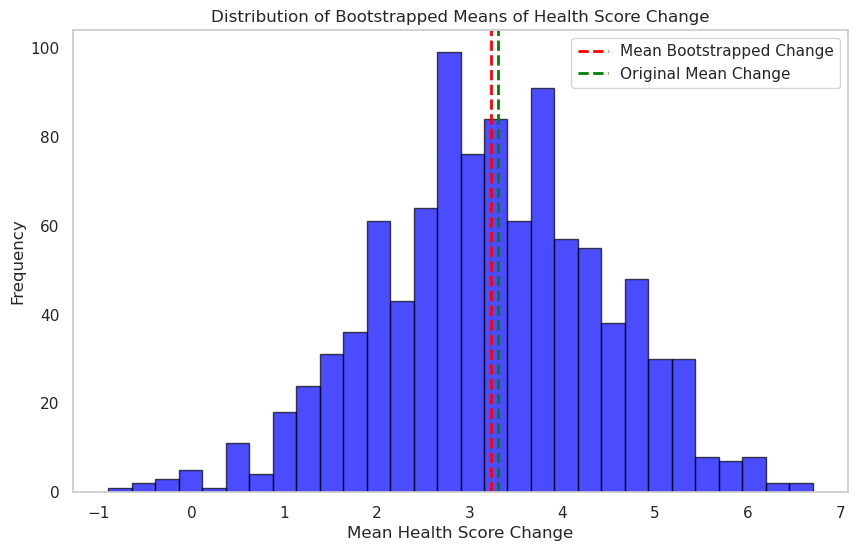

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84],
}

df = pd.DataFrame(data)

# Calculate the change in health score
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping
num_iterations = 1000
bootstrapped_means = []

for _ in range(num_iterations):
    sample = df['HealthScoreChange'].sample(frac=1, replace=True)
    bootstrapped_means.append(sample.mean())

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(bootstrapped_means), color='red', linestyle='dashed', linewidth=2, label='Mean Bootstrapped Change')
plt.axvline(df['HealthScoreChange'].mean(), color='green', linestyle='dashed', linewidth=2, label='Original Mean Change')
plt.title('Distribution of Bootstrapped Means of Health Score Change')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


- A quantitative analysis of the data and an explanation of the method and purpose of this method.

In [13]:
# Descriptive statistics
initial_stats = df['InitialHealthScore'].describe()
final_stats = df['FinalHealthScore'].describe()
mean_change = df['HealthScoreChange'].mean()
std_change = df['HealthScoreChange'].std()
print('Initial stats')
print(initial_stats)
print('\nFinal stats')
print(final_stats)
print('\nMean change')
print(mean_change)
print('\nSTD change')
print(std_change)

Initial stats
count    10.000000
mean     81.000000
std       2.828427
min      76.000000
25%      79.250000
50%      81.000000
75%      83.000000
max      85.000000
Name: InitialHealthScore, dtype: float64

Final stats
count    10.000000
mean     84.300000
std       2.110819
min      80.000000
25%      83.250000
50%      85.000000
75%      86.000000
max      86.000000
Name: FinalHealthScore, dtype: float64

Mean change
3.3

STD change
4.029061098237818


In [17]:
# Bootstrapping
num_iterations = 1000
bootstrapped_means = []

for _ in range(num_iterations):
    sample = df['HealthScoreChange'].sample(frac=1, replace=True)
    bootstrapped_means.append(sample.mean())

# Calculate the confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Print the outcomes
mean_bootstrapped = np.mean(bootstrapped_means)
print(f"Mean of Bootstrapped Means: {mean_bootstrapped:.2f}")
print(f"95% Confidence Interval for Mean Change: [{lower_bound:.2f}, {upper_bound:.2f}]")

Mean of Bootstrapped Means: 3.25
95% Confidence Interval for Mean Change: [0.80, 5.40]


- Conclusion Regarding the Null Hypothesis of "No Effect"

##### Null Hypothesis (H0)
The null hypothesis states that there is no effect of the vaccine on the health scores of the patients. This means that the mean change in health scores (Final Health Score - Initial Health Score) is equal to zero:

$$ H_0: \mu_{\text{change}} = 0 $$

##### Alternative Hypothesis (H1)
The alternative hypothesis suggests that there is an effect of the vaccine, meaning the mean change is not equal to zero:

$$ H_1: \mu_{\text{change}} \neq 0 $$

##### Results from Bootstrapping
From the bootstrapping analysis, we calculated:

- **Mean of Bootstrapped Means**: 3.25
- **95% Confidence Interval for Mean Change**: [0.80, 5.40]

#### Analysis of Results
1. **Mean Change**: The mean change in health scores is positive (3.25), indicating an overall improvement in health after vaccination.
  
2. **Confidence Interval**: The 95% confidence interval for the mean change does not include zero ([0.80, 5.40]). This indicates that we can be 95% confident that the true mean change in health scores is positive.

#### Conclusion
Based on the bootstrapping analysis and the resulting confidence interval, we reject the null hypothesis of no effect. The data provides sufficient evidence to support the alternative hypothesis, suggesting that the vaccine has a statistically significant effect on improving health scores.


### Summary of Interactions with ChatGPT
1. Data Overview
- You provided a dataset containing information about patients, including their initial and final health scores before and after receiving a new vaccine.
2. Initial Analysis
- We discussed how to analyze the effectiveness of the vaccine by calculating the change in health scores and determining basic statistics such as mean and standard deviation.
- You were introduced to the concept of bootstrapping as a method to estimate the sampling distribution of the mean change in health scores.
3. Bootstrapping Implementation
- We implemented a bootstrapping procedure in Python to resample the health score changes and calculate the mean for each sample.
- A histogram was created to visualize the distribution of the bootstrapped means, providing insight into the variability and central tendency of the results.
4. Quantitative Results
- Descriptive statistics were computed, indicating the average change in health scores.
- A 95% confidence interval for the mean change was calculated, indicating a range in which the true mean change lies.
5. Hypothesis Testing
- We formulated a null hypothesis (no effect of the vaccine) and an alternative hypothesis (the vaccine has an effect).
- Based on the bootstrapping results, we rejected the null hypothesis, concluding that there is sufficient evidence to support the effectiveness of the vaccine.
6. Conclusion
- The analysis indicated that the vaccine leads to a statistically significant improvement in health scores, with a mean change of approximately 3.25 and a confidence interval of [0.80, 5.40].
7. Next Steps
- We noted the importance of further research with larger sample sizes to validate these findings and explore the long-term effects of the vaccine.

[Chatbot transcript](https://chatgpt.com/share/66fb5908-4c08-800f-bb73-a400124ab4bc)

## Question 9
**yes!**